## Data processing and plotting for figure01

This notebook shows how we obtained the data for figure01 of the paper titled:

$\textit{A facility for cryogenic ion irradiation and in operando characterization of Rare-Earth Barium Copper Oxide superconducting tapes}$ by A.R Devitre, D.X. Fischer, K.B. Woller, B.C. Clark, M.P. Short, D.G. Whyte, and Z.S. Hartwig, published by the Review of Scientific Instruments. 

In particular, the notebook follows the treatment of our data treatment from raw data files (provided in ~/data/figure01/) to the production figure. This figure can be regenerated, modified, exported and used according to the license of the repository.

In [17]:
%matplotlib notebook
from scipy.optimize import curve_fit
import matplotlib, matplotlib.pyplot as plt
import os, numpy as np, pandas as pd
import hts_fitting as hts

def linear(x, a, b):
    return a*x+b

# Change this to match the destination folder with data for figure04
parentDirectory = '../data/figure01/'
outputDirectory = '../figures/raw/'

# Change this if you want labels on the figure axes
forPaper = False

# set a custom font
from matplotlib import font_manager
fontname = 'Century Gothic' 
fontfile = [f for f in font_manager.findSystemFonts(fontpaths='/Users/alexisdevitre/Library/Fonts') if fontname in f][0]
font_manager.fontManager.addfont(fontfile)
plt.rcParams['font.family'] = fontname

### Light ion ranges in Faraday Factory Japan REBCO coated conductor

<IPython.core.display.Javascript object>


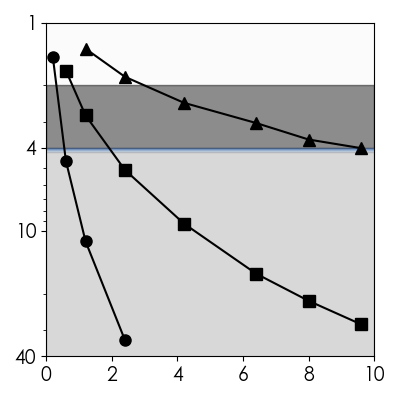

In [12]:
selected_energies = np.array([200e3, 600e3, 1200e3, 2400e3, 4200e3, 6400e3, 8000e3, 9600e3])

data = {
    'rng' : [14580.0, 27945.0, 46170.0, 64395.0, 85050.0, 112420.0, 160600.0, 220825.0, 334565.0, 425810.0, 577885.0, 699545.0, 851620.0, 1094940.0, 1368680.0, 1612000.0, 1916150.0, 2220300.0, 2585280.0, 9720.01, 13365.0, 17010.0, 20655.0, 24300.0, 27945.0, 35235.0, 43740.0, 51030.0, 64395.0, 77760.0, 92340.0, 108135.0, 136510.0, 160600.0, 188705.0, 216810.0, 244915.0, 281050.0, 6075.01, 8505.01, 9720.01, 10935.0, 12150.0, 13365.0, 14580.0, 17010.0, 18225.0, 19440.0, 21870.0, 24300.0, 26730.0, 27945.0, 30375.0, 32805.0, 36450.0, 37665.0, 40095.0],
    'species' : ['H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'He', 'He', 'He', 'He', 'He', 'He', 'He', 'He', 'He', 'He', 'He', 'He', 'He', 'He', 'He', 'He', 'He', 'He', 'He', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O'],
    'energy' : [200000.0, 400000.0, 600000.0, 800000.0, 1000000.0, 1200000.0, 1600000.0, 2000000.0, 2400000.0, 3000000.0, 3600000.0, 4200000.0, 4800000.0, 5600000.0, 6400000.0, 7200000.0, 8000000.0, 8800000.0, 9600000.0, 200000.0, 400000.0, 600000.0, 800000.0, 1000000.0, 1200000.0, 1600000.0, 2000000.0, 2400000.0, 3000000.0, 3600000.0, 4200000.0, 4800000.0, 5600000.0, 6400000.0, 7200000.0, 8000000.0, 8800000.0, 9600000.0, 200000.0, 400000.0, 600000.0, 800000.0, 1000000.0, 1200000.0, 1600000.0, 2000000.0, 2400000.0, 3000000.0, 3600000.0, 4200000.0, 4800000.0, 5600000.0, 6400000.0, 7200000.0, 8000000.0, 8800000.0, 9600000.0]
}

data = pd.DataFrame(data)

if not forPaper:
    fig, ax = plt.subplots(figsize=(7, 7))
else:
    fig, ax = plt.subplots(figsize=(4, 4))
    
for s, m in zip(['H', 'He', 'O'], ['o', 's', '^']):
    cut = (data.species == s) & (data.energy.isin(selected_energies)) & (1 < data.rng/1e4) & (data.rng/1e4 < 40)
    ax.semilogy(data[cut].energy/1e6, data[cut].rng/1e4, color='k', marker=m)

if not forPaper:
    ax.set_title('(a) Light ions with single MeV\nenergies stop in the substrate', fontsize=20)
    ax.set_xlabel('Ion energy [MeV]')
    ax.set_ylabel('Ion range [$\mu$m]')

ax.set_xlim(0, 10)
ax.set_ylim(1, 40)

ax.fill_between([0, 10], 0, 2, color='#F8F8F8', alpha=.5)
ax.fill_between([0, 10], 2, 4, color='black', alpha=.45)
ax.fill_between([0, 10], 4, 4.05, color='#154A9F', alpha=.3)
ax.fill_between([0, 10], 4.05, 4.10, color='#4C7AAE', alpha=.3)
ax.fill_between([0, 10], 4.10, 4.15, color='#7D9DC2', alpha=.3)
ax.fill_between([0, 10], 4.15, 4.20, color='#AFC2D5', alpha=.3)
ax.fill_between([0, 10], 4.20, 40.20, color='gray', alpha=.3)

ax.invert_yaxis()
ax.set_yticks([1, 4, 10, 40])
ax.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())

fig.tight_layout()
ax.set_rasterized(True)
plt.savefig(outputDirectory+'figure01-a.svg')

### Average displacements caused by 1200 keV protons a proton as a function of depth in a Faraday Factory Japan REBCO coated conductor

TRIM causes numerical artifacts at layer boundaries as explained in the documentation. Therefore, we find the true damage-rate in the REBCO layer by looking at a SRIM calculation of pure YBCO and extracting the displacements/A-ion that correspond to a range of 2 µm at a degraded energy 1.0088 MeV. This is the energy of incident 1.2 MeV protons  as they exit the 2 µm thick silver layer (interpolated from stopping power tables available through SRIM).

But since we still have an interface (perturbing the displacements/A-ion between 0 and 7500 A), we simulated the damage profile using 1.2 MeV protons and calculated the depth **zmin** at which the proton energy has degraded to 1.0088 MeV by interpolating the range of protons in the 0.9 to 1.3 MeV interval (also directly available from stopping power tables).

In [13]:
proton_energy = [900, 1000, 1100, 1200, 1300]
range_in_ybco = [13.53, 15.79, 18.17, 20.66, 23.27]

popt, pcov = curve_fit(linear, proton_energy, range_in_ybco)
zmin = (20.66-linear(1008.8, *popt))*1e4
zmax = zmin+21190 # accounts for the z-offset in SRIM curve

We can then use these bounds to extract the true displacements/A-ion depth profile from the 1.2 MeV proton calculation in pure YBCO

<IPython.core.display.Javascript object>


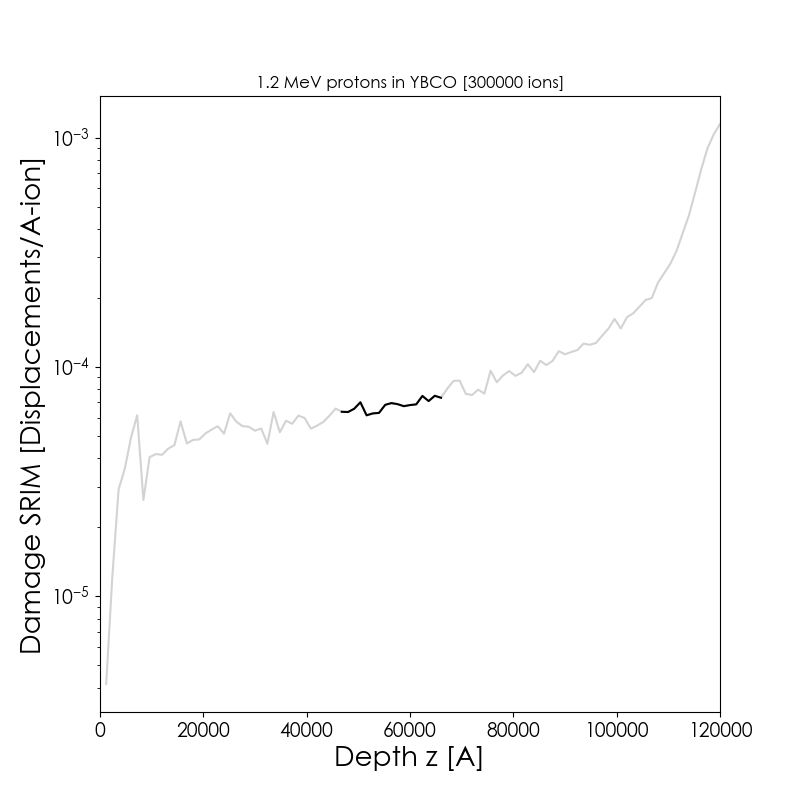

In [14]:
fpath = parentDirectory+'2023-12-09-08-12-01-716672-300000H-1200keV-1-ybco.txt'
data = pd.read_csv(fpath, skiprows=1, delimiter='\t', names=['depth', 'ph', 'iz', 'fp', 'ii'])
cut = (zmin < data.depth) & (data.depth < zmax)

depth_true = 1e-4*(data.depth[cut].values-data.depth[cut].values[0])+2 # region of interest [in µm]
fp_true = (1e4*data.fp[cut].values)[depth_true <= 4] # region of interest [in µm]
depth_true = depth_true[depth_true <= 4]

fig, ax = plt.subplots()
ax.semilogy(data.depth, data.fp, color='lightgray')
ax.semilogy(data.depth[cut], data.fp[cut], color='k')
ax.set_title('1.2 MeV protons in YBCO [300000 ions]')
ax.set_xlabel('Depth z [A]')
ax.set_ylabel('Damage SRIM [Displacements/A-ion]')
ax.set_xlim(0, 120000)

depth_true *= 1e-4
fp_true *= 1e4



<IPython.core.display.Javascript object>


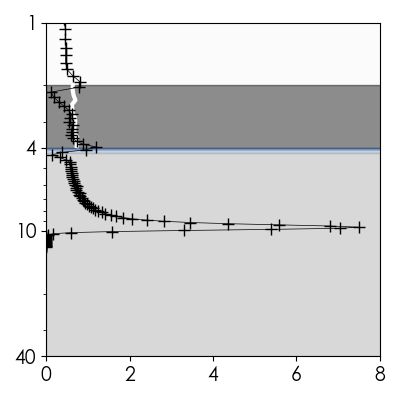

In [16]:
fname = '2023-12-08-05-18-19-210467-1000000H-1200keV-1-htstape.txt'
fpath = parentDirectory+fname

if not forPaper:
    fig, ax = plt.subplots(figsize=(7, 7), sharex=True)
else:
    fig, ax = plt.subplots(figsize=(4, 4), sharex=True)
    
name, energy = fname.split('-')[-2], fname.split('-')[1].split('.')[0][:-3]
data = pd.read_csv(fpath, skiprows=1, delimiter='\t', names=['depth', 'ph', 'iz', 'fp', 'ii'])
z, fp = data.depth/1e4, data.fp*1e4 

ax.semilogy(fp_true/1e4, depth_true*1e4, color='white', linewidth=3)
ax.semilogy(fp, z, 'k', marker='+', linewidth=.5)

if not forPaper:
    ax.set_title('(b) 1.2 MeV protons cause\nuniform damage in YBCO', fontsize=20)
    ax.set_ylabel('Depth [$\mathrm{\mu}$m]')
    ax.set_xlabel('Damage rate [$\mathrm{10^{-4}}$ vac/A-ion]')

ax.set_ylim(1e0, 4e1)
ax.set_xlim(0, 8)
ax.fill_between([0.000, 10], 0, 2, color='#F8F8F8', alpha=.5)
ax.fill_between([0.000, 10], 2, 4, color='black', alpha=.45)
ax.fill_between([0, 10], 4, 4.04, color='#154A9F', alpha=.3)
ax.fill_between([0, 10], 4.04, 4.07, color='#4C7AAE', alpha=.3)
ax.fill_between([0, 10], 4.07, 4.17, color='#7D9DC2', alpha=.3)
ax.fill_between([0, 10], 4.17, 4.22, color='#AFC2D5', alpha=.3)
ax.fill_between([0.000, 8], 4.22, 40, color='gray', alpha=.3)
ax.invert_yaxis()
ax.set_yticks([1, 4, 10, 40])
ax.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())

fig.tight_layout()
ax.set_rasterized(True)
plt.savefig(outputDirectory+'figure01-b.svg')